<a href="https://colab.research.google.com/github/mango766/ml_learning/blob/main/07%E9%99%8D%E7%BB%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

降维：

投影

PCA

In [ ]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 3、PCA主成分分析法

In [ ]:
import numpy as np
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [ ]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:0]
c2 = Vt.T[:1]

In [ ]:
W2 = Vt.T[:, :2]#取所有行的第0、1列数据
X2D = X_centered.dot(W2)

使用sklearn，将训练集投影到前两个主成分定义的平面上

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2);
X2D = pca.fit_transform(X)
X2D

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049],
       [-1.10436914,  0.20204953],
       [ 1.27265808,  0.46781247],
       [-0.44933007,  0.67736663],
       [-1.09356195, -0.04467792],
       [-0.66177325, -0.28651264],
       [ 1.04466138, -0.11244353],
       [-1.05932502,  0.31189109],
       [ 1.13761426,  0.14576655],
       [ 1.16044117,  0.36481599],
       [-1.00167625,  0.39422008],
       [ 0.2750406 , -0.34391089],
       [-0.45624787,  0.69707573],
       [-0.79706574, -0.26870969],
       [-0.66924929,  0.65520024],
       [ 1.30679728,  0.37671343],
       [-0.6626586 , -0.32706423],
       [ 1.25387588,  0.56043928],
       [ 1.04046987, -0.08727672],
       [ 1.26047729,  0.1571074 ],
       [-1.09786649,  0.38643428],
       [-0.7130973 ,  0.64941523],
       [ 0.17786909, -0.43609071],
       [-1.02975735,  0.33747452],
       [ 0.94552283,

## 3.5 可解释方差比

In [ ]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

表示数据集方差的84%位于第一个PC上，数据集方差的14%位于第二个PC上

## `3.6 选择正确的维度`

与其任意选择最小的维度数量，不如选择方差相加足够大的维度数，例如不降低维度，选择两三四五等维度数，使其相加的方差比大于95%。

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1


In [ ]:
pca = PCA(n_components=d)
#pca = PCA(n_components=0.95)或者直接设置要保留的方差比
X_reduced = pca.fit_transform(X_train)
X_reduced

array([[-563.82559445,  376.21158528,  547.80926278, ...,   19.38905129,
         -14.8845654 ,   54.51253826],
       [-247.60677316,  594.11581248, -761.17658857, ...,  -71.45002811,
         -35.42725361,   -6.14753115],
       [ -76.10689476, -718.88626737, -621.34715826, ...,  -33.70667711,
          46.79720596,   41.99423193],
       ...,
       [ 446.89768573,  200.53844515, -326.08785441, ...,   22.88163079,
          57.77169794,  -28.3108812 ],
       [ 794.82898691, -164.9787896 ,   48.41468921, ...,    4.61839146,
          -2.14649477,   17.03401382],
       [-903.11423891, -456.07653996, -139.5851229 , ...,   -2.61355561,
          -9.49564537,    2.05450968]])

Saving figure explained_variance_plot


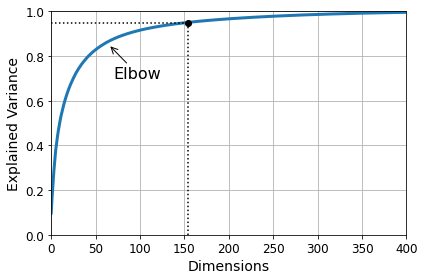

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

In [ ]:
pca.n_components_

154

3.7 PCA压缩

压缩为154个维度，再进行解压，对比误差成为重构误差

In [ ]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [ ]:
# EXTRA
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure mnist_compression_plot


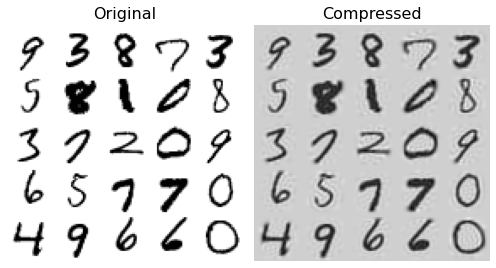

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

随机pca,快速找到前d个主成分的近似值，当d远小于n时，他比完全的svd快的多

In [ ]:
rnd_pca = PCA(n_components = 154,svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

增量PCA

In [ ]:
# from sklearn.decomposition import IncrementalPCA

# n_batches = 100
# inc_pca = IncrementalPCA(n_components=154)
# for X_batch in np.array_split(X_train,n_batches):
#   inc_pca.partial_fit(X_batch)
# X_reduced = inc_pca.transfrom(X_train)

AttributeError: ignored

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
y = t > 6.9

In [ ]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf",gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

使用网格搜索查找最佳内核和grammar

In [ ]:
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca",KernelPCA(n_components=2)),
    ("log_reg",LogisticRegression(solver="lbfgs"))
])

param_grid = [{
    "kpca__gamma":np.linspace(0.03,0.05,10),
    "kpca__kernel":["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf,param_grid,cv=3)
grid_search.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [ ]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

# 5、LLE

局部性嵌入LLE,强大的非线性降维技术

In [ ]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

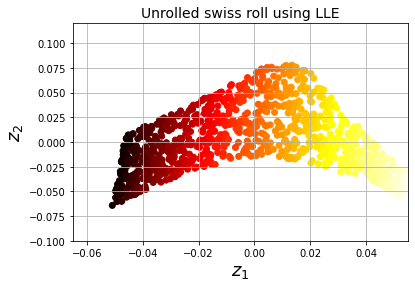

In [ ]:
import matplotlib.pyplot as plt
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

# save_fig("lle_unrolling_plot")
plt.show()

# 作业1：使用mnist数据集,随机森林分类器，使用PCA与不使用PCA对比


In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

不使用PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
import time
t0 = time.time()
rnd_clf.fit(X_train,y_train)
t1 = time.time()
print("随机森林分类器训练时间为：{:.2f}s".format(t1 - t0))

随机森林分类器训练时间为：69.88s


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = rnd_clf.predict(X_test)
print("不使用PCA的随机森林预测准确率为：",accuracy_score(y_pred,y_test))

不使用PCA的随机森林预测准确率为： 0.9705


使用PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_preduced = pca.fit_transform(X_train)

In [ ]:
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
import time
t2 = time.time()
rnd_clf2.fit(X_train_preduced,y_train)
t3 = time.time()
print("使用PCA随机森林分类器训练时间为：{:.2f}s".format(t3 - t2))

使用PCA随机森林分类器训练时间为：120.98s


不好了！现在训练实际上慢了两倍！这个怎么可能？好吧，正如我们在本章中看到的，降维并不总是会带来更快的训练时间：它取决于数据集、模型和训练算法。如果您尝试使用 softmax 分类器而不是随机森林分类器，您会发现使用 PCA 时训练时间减少了 3 倍。实际上，我们稍后会这样做，但首先让我们检查新的随机森林分类器的精度。

In [ ]:
from sklearn.metrics import accuracy_score
X_test_reduced = pca.transform(X_test)
y_pred2 = rnd_clf2.predict(X_test_reduced)
print("使用PCA的随机森林预测准确率为：",accuracy_score(y_pred2,y_test))

使用PCA的随机森林预测准确率为： 0.9481


降维时性能略有下降是很常见的，因为我们在这个过程中确实丢失了一些有用的信号。但是，在这种情况下，性能下降相当严重。所以 PCA 确实没有帮助：它减慢了训练速度并降低了性能。

使用多元逻辑回归分类器

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

print("Training took {:.2f}s".format(t1 - t0))

Training took 47.00s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [24]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

In [25]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_preduced, y_train)
t1 = time.time()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [26]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 14.42s


In [27]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9201

性能略有下降，这可能是为 2 倍加速付出的合理代价，具体取决于应用程序。所以你有它：PCA 可以给你一个强大的加速......但并非总是如此！